## Importing Required Libraries

In [1]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [14]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.optimizers import SGD

## Assigning Path for Dataset

In [2]:

TRAIN_DIR = "emotion/train"

TEST_DIR = "emotion/test"


### Preparing data for training

In [19]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(validation_split=0.1,rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,subset="training",color_mode="grayscale",
                                                 target_size = (128, 128)
                                                 #batch_size = BATCH_SIZE,
                                                 ,class_mode = 'categorical')

valid_set = train_datagen.flow_from_directory(TRAIN_DIR,subset="validation",target_size=(128,128),color_mode="grayscale",class_mode = 'categorical')


test_set = test_datagen.flow_from_directory(TEST_DIR,color_mode="grayscale",
                                            target_size = (128, 128)
                                            #batch_size = BATCH_SIZE,
                                            ,class_mode = 'categorical')



Found 5165 images belonging to 6 classes.
Found 572 images belonging to 6 classes.
Found 720 images belonging to 6 classes.


### Basic model building (CNN Classifier)

In [8]:
# We are using convo2D and fully connected dense layers for our classification.
dim=128

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(dim,dim,1), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(6,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)        0         
                                                        

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.optimizers import SGD
from skimage import io
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [10]:
epoch=50
learning_rate=0.01
decay_rate=learning_rate/epoch
momentum=0.8
sgd=SGD(lr=learning_rate,momentum=momentum,decay=decay_rate)

C:\Users\ascom\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
# Early stopping callback
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

#used to force stop the model from training when it reached the least possible loss

In [12]:
# Compiling the CNN
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
# Training stops after 16 epochs due to early stopping
model_history=model.fit(training_set,batch_size=32,epochs=epoch
                        ,validation_data=valid_set,shuffle=True, callbacks=[callback])

Epoch 1/50
162/162 [==============================] - 269s 2s/step - loss: 1.7885 - accuracy: 0.1973 - val_loss: 1.7904 - val_accuracy: 0.1713
Epoch 2/50
162/162 [==============================] - 269s 2s/step - loss: 1.6954 - accuracy: 0.3005 - val_loss: 1.7202 - val_accuracy: 0.2745
Epoch 3/50
162/162 [==============================] - 269s 2s/step - loss: 1.4470 - accuracy: 0.4182 - val_loss: 1.6140 - val_accuracy: 0.3706
Epoch 4/50
162/162 [==============================] - 270s 2s/step - loss: 1.3339 - accuracy: 0.4732 - val_loss: 1.5501 - val_accuracy: 0.3497
Epoch 5/50
162/162 [==============================] - 271s 2s/step - loss: 1.2325 - accuracy: 0.5107 - val_loss: 1.4928 - val_accuracy: 0.4003
Epoch 6/50
162/162 [==============================] - 277s 2s/step - loss: 1.1674 - accuracy: 0.5411 - val_loss: 1.6164 - val_accuracy: 0.3759
Epoch 7/50
162/162 [==============================] - 283s 2s/step - loss: 1.1051 - accuracy: 0.5791 - val_loss: 1.5095 - val_accuracy: 0.4283

### Evaluating the model

In [21]:
model.evaluate(test_set)

23/23 [==============================] - 9s 376ms/step - loss: 1.1314 - accuracy: 0.5792


[1.1314365863800049, 0.5791666507720947]

Text(0, 0.5, 'Loss')

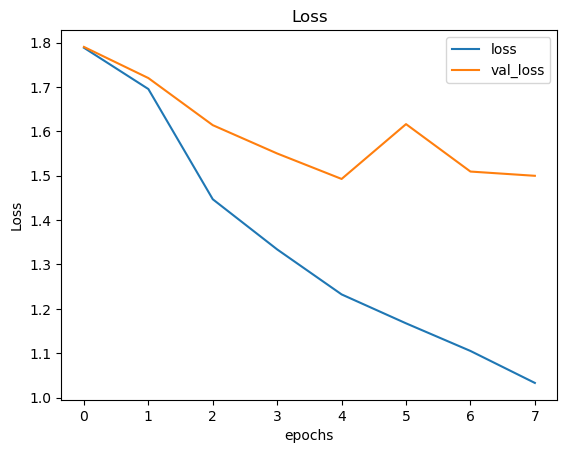

In [24]:
from matplotlib import pyplot as plt

pd.DataFrame(model_history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

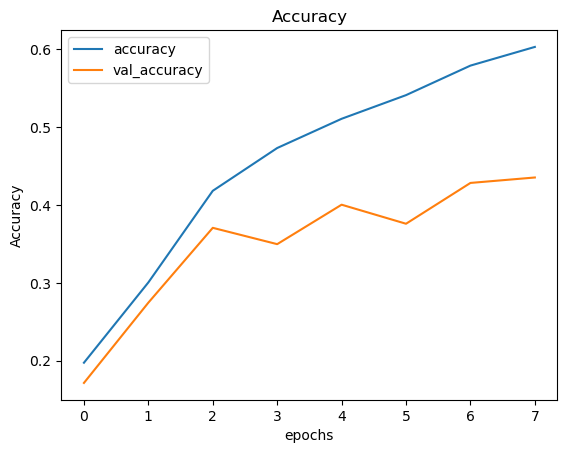

In [25]:
pd.DataFrame(model_history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')